# Thera Bank Personal Loan Campaign

### Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign

### Attribute Information:

- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (1000)
- ZIP Code: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month (1000)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (1000)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

### Learning Outcomes:
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classification model
- Model evaluation

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Steps and tasks


## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### All yes and no answers are marked with1 or 0

In [3]:
print('number of rows and columns in data is:',df.shape)

number of rows and columns in data is: (5000, 14)


In [4]:
#datatype
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Experince has negative values and should be corrected

In [7]:
# null values:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
#data imputaion check for zeros
(df==0).sum(axis=0)

ID                       0
Age                      0
Experience              66
Income                   0
ZIP Code                 0
Family                   0
CCAvg                  106
Education                0
Mortgage              3462
Personal Loan         4520
Securities Account    4478
CD Account            4698
Online                2016
CreditCard            3530
dtype: int64

number of zero looks relavent we don't do imputation

In [9]:
#data imputaion check for negatives
(df<0).sum(axis=0)


ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [10]:
df[df['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


there are 52 cases where number of experince .The error might be due to a typo, so our strategy is to replace them with positive values.

In [11]:
#replace negaties with positive value
df.Experience=df.Experience.mask(df.Experience.lt(0),np.abs(df.Experience))
df[df['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


## 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

### Number of unique in each column?

In [12]:
df.nunique() # Number of unique values in a column

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Family, Education,Personal Loan, Securities Account, CD Account, Online, and Credit card can be categorized. 

### Number of people with zero mortgage?

In [13]:
print('Number of people with zero mortgage is:',(df['Mortgage']==0).sum())

Number of people with zero mortgage is: 3462


### Number of people with zero credit card spending per month?

In [14]:
print('Number of people with zero credit card spending per month:',(df['CCAvg']==0).sum())

Number of people with zero credit card spending per month: 106


### Value counts of all categorical columns.

In [15]:
#Convert variable to a categorical variable
cr_df = df.drop('ID', axis =1 ) # dropping ID and zipcode since it is unique for each customer and no needed in modeling
cr_df = cr_df.drop('ZIP Code', axis =1 )
for i in ['Family','Education','Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']:
    cr_df[i] = cr_df[i].astype('category')
for i in list(cr_df.columns[cr_df.dtypes=='category']):   # checking value counts of all object type columns
    print(cr_df[i].value_counts(normalize=True))
    print()

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64



 Normalize value count show imbalance in data. 

### Univariate and Bivariate

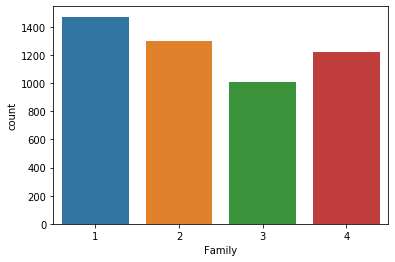

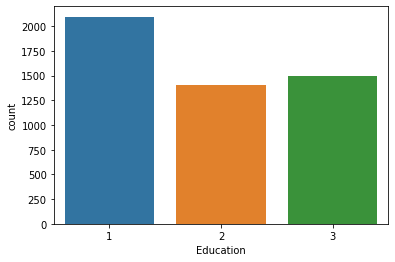

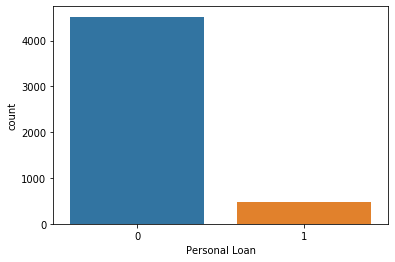

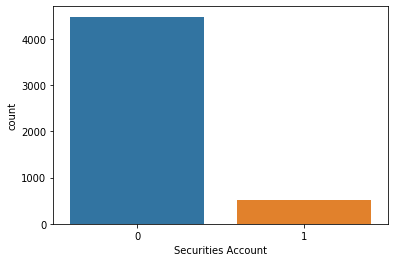

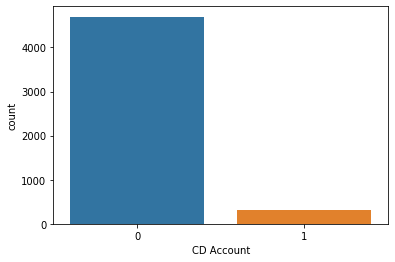

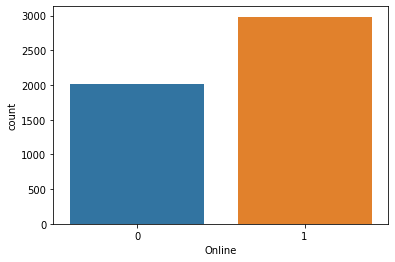

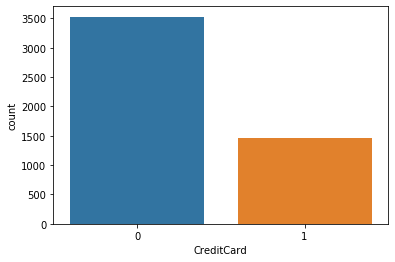

In [16]:

for i in cr_df.columns[cr_df.dtypes=='category']:
    sns.countplot(cr_df[i])
    plt.show()

Univariate plots show forexample there are more people who use online acount or majority of people don't get personal loan or majority of people don't have Credit card or CD account.

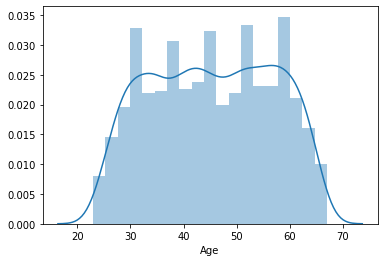

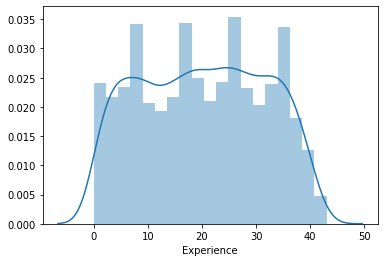

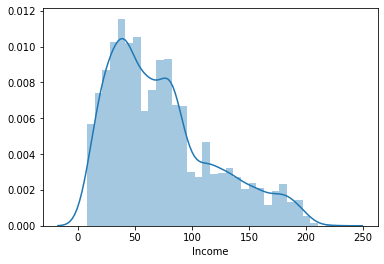

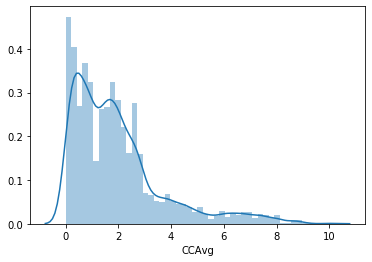

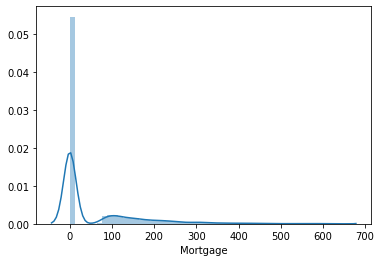

In [17]:
for i in cr_df.columns[cr_df.dtypes!='category']:
    sns.distplot(cr_df[i])
    plt.show()

Plots show for example majority of customers have income 50 (data skewed) or mean of age and experince of customers is 40 yrs and 20 yrs experinces. Majority of customers don't have mortgage.

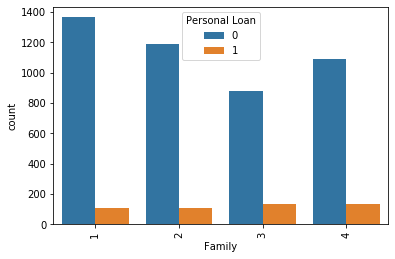

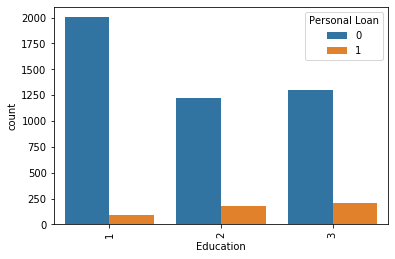

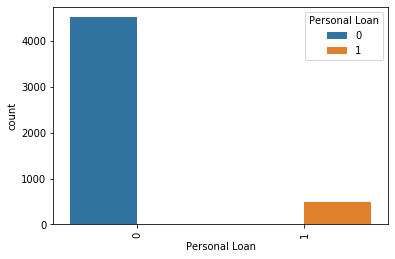

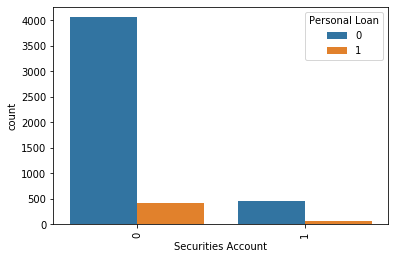

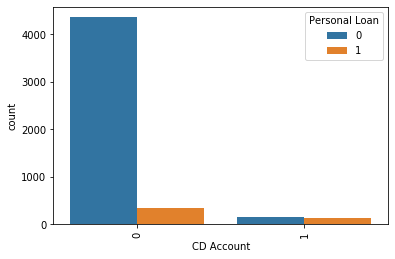

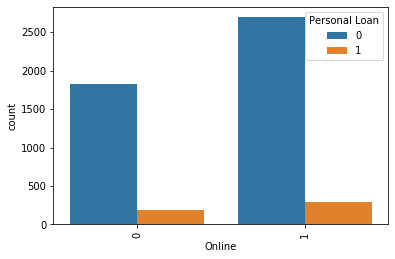

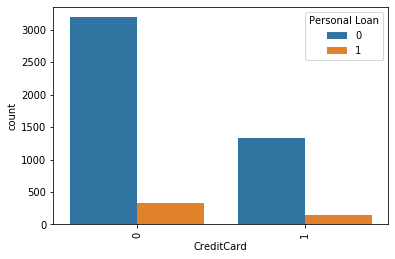

In [18]:
for i in cr_df.columns[cr_df.dtypes=='category']:
    sns.countplot(x = i,data=cr_df,hue='Personal Loan')
# it plots a barplot where y axis shows the count of each category and here 'hue' is used to represent diffrenent class of target
    plt.xticks(rotation=90) # to rotate labels of x-axis
    plt.show()

By these plots we try to find out if personal loan is observed higher in specefic category. For example family with 4 numbers or higher education (category 3) have slightly more chance to get personal loan. The customers who have or don’t have securities account or online account or credit card with the bank do not affect the probability of buying a personal loan.The customer who has a certificate of deposit (CD) account with the bank seems to buy personal loans from the bank.  but not major dependency can be concluded.

In [19]:
# We look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
cr_df.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.367257,20.165487,66.237389,1.729009,51.789381
1,45.066667,19.843750,144.745833,3.905354,100.845833


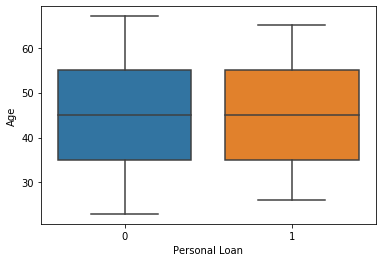

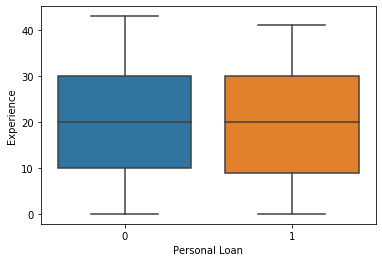

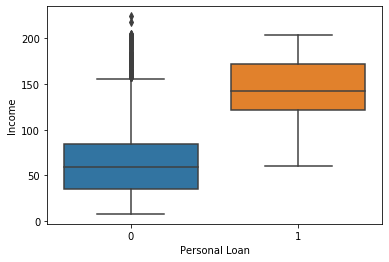

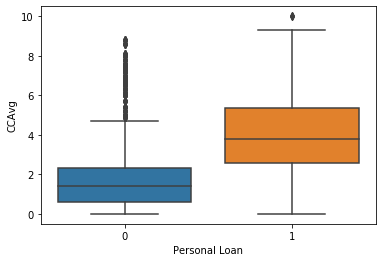

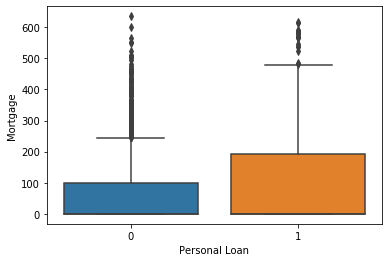

In [20]:
for i in cr_df.columns[cr_df.dtypes!='category']:
    sns.boxplot(x='Personal Loan',y=i,data=cr_df)
    plt.show()

Customer who have higher income and spending credit card per mmonth and higher Mortgage are more feasible to accept Personal loan. but there is no relation to Age or Experince 

In [21]:
cr_df.groupby(["Personal Loan"]).median()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.0,20.0,59.0,1.4,0.0
1,45.0,20.0,142.5,3.8,0.0


Median Mortgage is 0 means there are lots of zero Mortgage in data

In [22]:
pd.crosstab(cr_df['Education'],cr_df['Personal Loan'],normalize='index')


Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


Advanced graduate has maximum personal loan but no significant correlation

In [23]:
pd.crosstab(cr_df['Securities Account'],cr_df['Personal Loan'],normalize='index')

Personal Loan,0,1
Securities Account,,
0,0.906208,0.093792
1,0.885057,0.114943


In [24]:
pd.crosstab(cr_df['Family'],cr_df['Personal Loan'],normalize='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


In [25]:
pd.crosstab(cr_df['CD Account'],cr_df['Personal Loan'],normalize='index')

Personal Loan,0,1
CD Account,,
0,0.927629,0.072371
1,0.536424,0.463576


Having an online account is not necessarily means getting personal loan

In [26]:
pd.crosstab(cr_df['CreditCard'],cr_df['Personal Loan'],normalize='index')

Personal Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


In [27]:
pd.crosstab(cr_df['Online'],cr_df['Personal Loan'],normalize='index')

Personal Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


No major difference having credit card or online account to get personal loan

## <a id = "link6"></a> Model building using Logistic Regression from Sklearn 

In [28]:
## Define X and Y variables
X=cr_df.drop('Personal Loan',axis=1)
Y=cr_df['Personal Loan']


In [29]:
#Convert categorical vriables to dummy variables
# drop first means we get k-1 dummies out of k categorical levels by removing the first level for higher computational time.
X = pd.get_dummies(X,drop_first=True)
X

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1,49,1.6,0,0,0,1,0,0,1,0,0,0
1,45,19,34,1.5,0,0,1,0,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,1,0,0,0,0,0
4,35,8,45,1.0,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,0,0,0,0,0,1,0,0,1,0
4996,30,4,15,0.4,85,0,0,1,0,0,0,0,1,0
4997,63,39,24,0.3,0,1,0,0,0,1,0,0,0,0
4998,65,40,49,0.5,0,0,1,0,1,0,0,0,1,0


## 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [30]:
##Split into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)
print("{0:0.2f}% data is in training set".format((len(X_train)/len(cr_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(cr_df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


## 4. Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance (15 marks)

In [31]:
model=LogisticRegression(random_state=7)
model.fit(X_train,y_train)  # fit the model on train data


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_predicted=model.predict(X_test)

In [33]:
z=pd.DataFrame()
z['probability that output is 1']=model.predict_proba(X_test)[:,1]
z['probability that output is 0']=model.predict_proba(X_test)[:,0]
z['predicted']=y_predicted
z['observed']=y_test.values
z.head()
#In sklearn default threshold is 0.5
# therfore for all the values whose probability for 1 is greater than 0.5 will be predicted as 1

,probability that output is 1,probability that output is 0,predicted,observed
0,0.022204,0.977796,0,0
1,0.000484,0.999516,0,0
2,0.000665,0.999335,0,0
3,0.002897,0.997103,0,0
4,0.160925,0.839075,0,0


In [34]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predicted))
print()
print("Precision:",precision_score(y_test,y_predicted))
print()
print("F1 Score:",f1_score(y_test,y_predicted))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predicted))


Trainig accuracy 0.9602857142857143

Testing accuracy 0.9526666666666667

Recall: 0.5973154362416108

Precision: 0.89

F1 Score: 0.714859437751004

Roc Auc Score: 0.7945866596456018


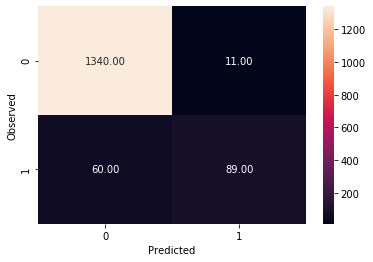

In [35]:
#Confusion matrix
cm = confusion_matrix( y_test, y_predicted)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

- Recall or sensitivity is Total positives that correctly identified. (TP/(TP+FN)))=0.59. It means the number of customers who took personal loan and correctly identified. 
- Precision shows from the positives we selected, how many are relevant. (TP/(TP+FP))=0.89

This model has a better precision than recall. 60% of customers that get personal loan are selected, but 89% of the customers that are selected are really eligible for the loans.

- specificity or true negative rate means proportional of total negatives that are correctly identified or (TN/(TN+FP))=1340/(1340+11)=0.99 . Model is very good in identifying customers didn't get loan but it is mostly because majority of customers don't get personal loan or the model is heavy imbalanced.


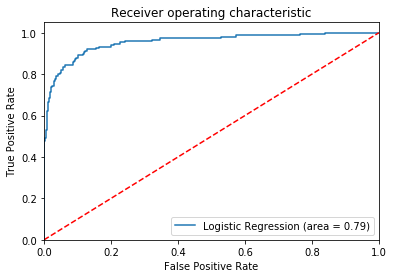

In [36]:
# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The area under roc curve AUC explains how good is model.

In [37]:
coef_df = pd.DataFrame(data=model.coef_,columns=X.columns)
coef_df['intercept'] = model.intercept_
coef_df

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,intercept
0,-0.435691,0.434516,0.054279,0.198067,0.000832,-0.15269,1.954925,1.244025,3.384131,3.613256,-0.43064,2.717188,-0.447288,-0.761374,-0.524294


## 5. Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not? (10 marks)

In [38]:
# Checking Parameters of logistic regression
model.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Trying different solvers

In [39]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'
train_score=[];test_score=[];recall=[];precision=[];f1=[];roc_auc=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
pars = ['newton-cg l2 c0.75','lbfgs l2 c0.75','liblinear l2 c0.75','sag l2 c0.75','saga l2 c0.75']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    recall.append(round(recall_score(y_test,y_predict),3))
    precision.append(round(precision_score(y_test,y_predict),3))
    f1.append(round(f1_score(y_test,y_predict),3))
    roc_auc.append(round(roc_auc_score(y_test,y_predict),3))

moper=pd.DataFrame()
moper['parameter']=pars
moper['test_score']=test_score
moper['train_score']=train_score
moper['recall_score']=recall
moper['precision_score']=precision
moper['f1_score']=f1
moper['roc_auc_score']=roc_auc
moper.head()

,parameter,test_score,train_score,recall_score,precision_score,f1_score,roc_auc_score
0,newton-cg l2 c0.75,0.952,0.961,0.584,0.897,0.707,0.788
1,lbfgs l2 c0.75,0.953,0.960,0.597,0.890,0.715,0.795
2,liblinear l2 c0.75,0.951,0.960,0.577,0.887,0.699,0.785
3,sag l2 c0.75,0.899,0.908,0.262,0.488,0.341,0.616
4,saga l2 c0.75,0.904,0.907,0.262,0.534,0.351,0.618


The solvers 'newton-cg', 'lbfgs', 'liblinear' score better accuracy in the solvers.

## Trying l1 regularization

In [40]:
train_score=[];test_score=[];recall=[];precision=[];f1=[];roc_auc=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))   
    recall.append(round(recall_score(y_test,y_predict),3))
    precision.append(round(precision_score(y_test,y_predict),3))
    f1.append(round(f1_score(y_test,y_predict),3))
    roc_auc.append(round(roc_auc_score(y_test,y_predict),3))

moperl1=pd.DataFrame()
moperl1['parameter']=['liblinear l1 c0.75','saga l1 c0.75']
moperl1['test_score']=test_score
moperl1['train_score']=train_score
moperl1['recall_score']=recall
moperl1['precision_score']=precision
moperl1['f1_score']=f1
moperl1['roc_auc_score']=roc_auc
moperl1.head()

,parameter,test_score,train_score,recall_score,precision_score,f1_score,roc_auc_score
0,liblinear l1 c0.75,0.953,0.962,0.597,0.899,0.718,0.795
1,saga l1 c0.75,0.905,0.907,0.268,0.541,0.359,0.622


regularization l1 works better for libinear and saga solvers

## cheking balanced class weight

In [41]:

train_score=[];test_score=[];recall=[];precision=[];f1=[];roc_auc=[]
solver=['liblinear'];class_weight=['balanced'];penalty=['l1']
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced
model.fit(X_train, y_train) 
y_predict = model.predict(X_test)     
train_score.append(round(model.score(X_train, y_train),3))
test_score.append(round(model.score(X_test, y_test),3))   
recall.append(round(recall_score(y_test,y_predict),3))
precision.append(round(precision_score(y_test,y_predict),3))
f1.append(round(f1_score(y_test,y_predict),3))
roc_auc.append(round(roc_auc_score(y_test,y_predict),3))

mopercw=pd.DataFrame()
mopercw['parameter']=['liblinear l1 c1 b']
mopercw['test_score']=test_score
mopercw['train_score']=train_score
mopercw['recall_score']=recall
mopercw['precision_score']=precision
mopercw['f1_score']=f1
mopercw['roc_auc_score']=roc_auc
mopercw.head()


,parameter,test_score,train_score,recall_score,precision_score,f1_score,roc_auc_score
0,liblinear l1 c1 b,0.915,0.917,0.866,0.544,0.668,0.893


balanced wight works better for AUC since data are skewed (lots of zeros). It improves recall but reduces precision significantly. 

## Running a loop to check different values of 'C'

In [42]:
# Running a loop to check different values of 'C' and balanced weight for liblinear solver

train_score=[];test_score=[];recall=[];precision=[];f1=[];roc_auc=[]
solver=['liblinear'];
C = [0.01,0.1,0.25,0.5,0.75,1]
pars = ['liblinear l1 c0.01b', 'liblinear l1 c0.1b','liblinear l1 c0.25b','liblinear l1 c0.5b','liblinear l1 c0.75b','liblinear l1 c1b']

for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    recall.append(round(recall_score(y_test,y_predict),3))
    precision.append(round(precision_score(y_test,y_predict),3))
    f1.append(round(f1_score(y_test,y_predict),3))
    roc_auc.append(round(roc_auc_score(y_test,y_predict),3))

moperCb=pd.DataFrame()
moperCb['parameter']=pars
moperCb['test_score']=test_score
moperCb['train_score']=train_score
moperCb['recall_score']=recall
moperCb['precision_score']=precision
moperCb['f1_score']=f1
moperCb['roc_auc_score']=roc_auc
moperCb

,parameter,test_score,train_score,recall_score,precision_score,f1_score,roc_auc_score
0,liblinear l1 c0.01b,0.843,0.860,0.839,0.371,0.514,0.841
1,liblinear l1 c0.1b,0.907,0.909,0.872,0.520,0.652,0.892
2,liblinear l1 c0.25b,0.909,0.913,0.872,0.524,0.655,0.893
3,liblinear l1 c0.5b,0.913,0.915,0.866,0.538,0.663,0.892
4,liblinear l1 c0.75b,0.915,0.916,0.866,0.547,0.670,0.893
5,liblinear l1 c1b,0.915,0.917,0.866,0.544,0.668,0.893


In [43]:
# Running a loop to check different values of 'C' and without balanced weight for liblinear solver

train_score=[];test_score=[];recall=[];precision=[];f1=[];roc_auc=[]
solver=['liblinear'];
C = [0.01,0.1,0.25,0.5,0.75,1]
pars = ['liblinear l1 c0.01', 'liblinear l1 c0.1','liblinear l1 c0.25','liblinear l1 c0.5','liblinear l1 c0.75','liblinear l1 c1']

for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    recall.append(round(recall_score(y_test,y_predict),3))
    precision.append(round(precision_score(y_test,y_predict),3))
    f1.append(round(f1_score(y_test,y_predict),3))
    roc_auc.append(round(roc_auc_score(y_test,y_predict),3))

moperC=pd.DataFrame()
moperC['parameter']=pars
moperC['test_score']=test_score
moperC['train_score']=train_score
moperC['recall_score']=recall
moperC['precision_score']=precision
moperC['f1_score']=f1
moperC['roc_auc_score']=roc_auc
moperC

,parameter,test_score,train_score,recall_score,precision_score,f1_score,roc_auc_score
0,liblinear l1 c0.01,0.903,0.905,0.255,0.528,0.344,0.615
1,liblinear l1 c0.1,0.949,0.956,0.557,0.883,0.683,0.774
2,liblinear l1 c0.25,0.950,0.959,0.570,0.885,0.694,0.781
3,liblinear l1 c0.5,0.952,0.962,0.584,0.897,0.707,0.788
4,liblinear l1 c0.75,0.953,0.962,0.597,0.899,0.718,0.795
5,liblinear l1 c1,0.955,0.962,0.617,0.902,0.733,0.805


default value C=1 works better for bilinear solver. smaller values of C specify stronger regularization.

In [44]:
# Running a loop to check different values of 'C' lbfgs solver

train_score=[];test_score=[];recall=[];precision=[];f1=[];roc_auc=[]
solver=['lbfgs'];
C = [0.01,0.1,0.25,0.5,0.75,1]
pars = ['lbfgs l2 c0.01b', 'lbfgs l2 c0.1b','lbfgs l2 c0.25b','lbfgs l2 c0.5b','lbfgs l2 c0.75b','lbfgs l2 c1b']

for i in C:
    model = LogisticRegression(random_state=42,penalty='l2', solver='lbfgs',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    recall.append(round(recall_score(y_test,y_predict),3))
    precision.append(round(precision_score(y_test,y_predict),3))
    f1.append(round(f1_score(y_test,y_predict),3))
    roc_auc.append(round(roc_auc_score(y_test,y_predict),3))

moperCn=pd.DataFrame()
moperCn['parameter']=pars
moperCn['test_score']=test_score
moperCn['train_score']=train_score
moperCn['recall_score']=recall
moperCn['precision_score']=precision
moperCn['f1_score']=f1
moperCn['roc_auc_score']=roc_auc
moperCn

,parameter,test_score,train_score,recall_score,precision_score,f1_score,roc_auc_score
0,lbfgs l2 c0.01b,0.879,0.883,0.859,0.444,0.586,0.870
1,lbfgs l2 c0.1b,0.902,0.906,0.879,0.504,0.641,0.892
2,lbfgs l2 c0.25b,0.907,0.910,0.879,0.520,0.653,0.895
3,lbfgs l2 c0.5b,0.905,0.907,0.879,0.514,0.649,0.894
4,lbfgs l2 c0.75b,0.907,0.911,0.872,0.520,0.652,0.892
5,lbfgs l2 c1b,0.907,0.907,0.886,0.520,0.655,0.898


default value C=1 works better in overall also for lbfgs solver

In [45]:
pd.concat([moper,moperl1,mopercw,moperC,moperCb,moperCn]).sort_values(by=['precision_score'])

,parameter,test_score,train_score,recall_score,precision_score,f1_score,roc_auc_score
0,liblinear l1 c0.01b,0.843,0.860,0.839,0.371,0.514,0.841
0,lbfgs l2 c0.01b,0.879,0.883,0.859,0.444,0.586,0.870
3,sag l2 c0.75,0.899,0.908,0.262,0.488,0.341,0.616
1,lbfgs l2 c0.1b,0.902,0.906,0.879,0.504,0.641,0.892
3,lbfgs l2 c0.5b,0.905,0.907,0.879,0.514,0.649,0.894
1,liblinear l1 c0.1b,0.907,0.909,0.872,0.520,0.652,0.892
4,lbfgs l2 c0.75b,0.907,0.911,0.872,0.520,0.652,0.892
2,lbfgs l2 c0.25b,0.907,0.910,0.879,0.520,0.653,0.895
5,lbfgs l2 c1b,0.907,0.907,0.886,0.520,0.655,0.898
2,liblinear l1 c0.25b,0.909,0.913,0.872,0.524,0.655,0.893


b in pars stands for balanced class weight. ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets. Since precision is very important metric for us (reasons are given in business insight) We choose the final row of the table as the final model where AUC and precision both have good reults (liblinear with l1 c1 without balanced weight).

## 6. Give Business understanding of your model? (5 marks)

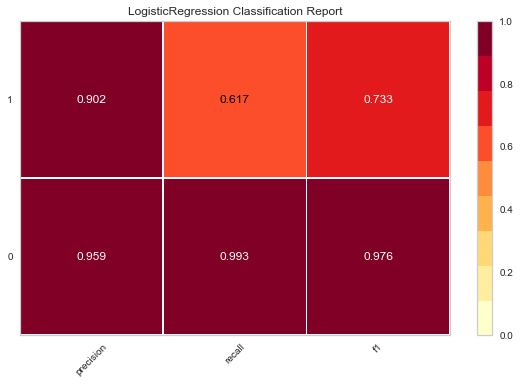

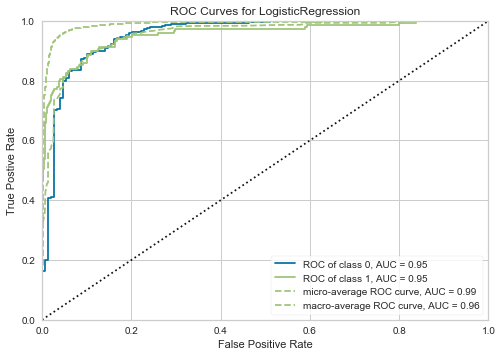

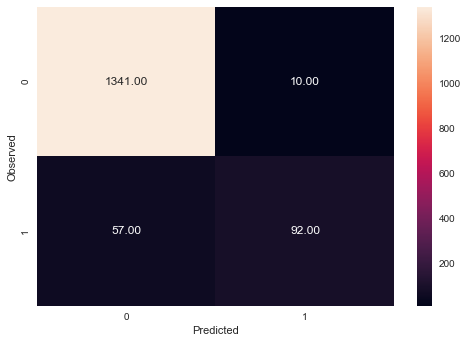

In [46]:
#first we try the model gives the best overall performance
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',C=1)  # changing values of C
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

#Confusion matrix
cm = confusion_matrix( y_test, model.predict(X_test))
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

In [47]:
cm/len(X_test)*100


array([[89.4       ,  0.66666667],
       [ 3.8       ,  6.13333333]])

## Business insight 
Confusion matrix means

True Positive (observed=1,predicted=1):
Predicted that Personal loan will be granted and the customer was eligibile for loan is 92 out of 1500 test customers or 6%

False Positive (observed=0,predicted=1):
Predicted that Personal loan will be granted and the customer was not eligibile for loan is 10 out of 1500 test customers or 0.7%

True Negative (observed=0,predicted=0):
Predicted that home loan will not be granted and the customer was not eligibile for loan is 1341 out of 1500 test customers or 89%

False Negative (observed=1,predicted=0):
Predicted that home loan will not be granted and the customer was eligibile for loan is 57 out of 1500 test customers or 4%

Recall or sensitivity indicates the number of customers who took personal loan and correctly identified. Recall ratio of the model is (TP/(TP+FN)))=0.6 and Precision shows from the customers who took the personal loan (TP+FP), how many were truly eligible for that. (TP/(TP+FP))=0.9. In this model FP is low and we have "high precision". This is good since this way bank is not losing money. Although recall is low (high FN). If FN goes high it means that bank loses more customers since less customers are granted although they are eligible. but what is more important for the bank is lowring FP (type 1 error) rather than FN (type 2 error) to lose less money rather than losing customers.
 So if we want to have a model for a better precision we need to tune the model hyperparameters at the cost of less accuracy. 
After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who is eligible for home loan. They can use the model for upcoming customers
